<h2 style="background-color: #F0F8FF; color:blue; padding: 10px; border: 1px solid #ddd;"><b>Predicting Final Grades</b></h2>
<h4><b>Problem Statement:</b> The goal is to predict academic grades based on avalable variables</h4>

<center><h3 style="background-color: #F0F8FF; padding: 10px; border: 1px solid #ddd;"><b>1. Data Loading & Preprocessing:</b</h3></center>

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import legend
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read dataset
df = pd.read_csv('Dataset/merged_dataset.csv', sep = ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14003 entries, 0 to 14002
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   StudyHours            14003 non-null  int64
 1   Attendance            14003 non-null  int64
 2   Resources             14003 non-null  int64
 3   Extracurricular       14003 non-null  int64
 4   Motivation            14003 non-null  int64
 5   Internet              14003 non-null  int64
 6   Gender                14003 non-null  int64
 7   Age                   14003 non-null  int64
 8   LearningStyle         14003 non-null  int64
 9   OnlineCourses         14003 non-null  int64
 10  Discussions           14003 non-null  int64
 11  AssignmentCompletion  14003 non-null  int64
 12  ExamScore             14003 non-null  int64
 13  EduTech               14003 non-null  int64
 14  StressLevel           14003 non-null  int64
 15  FinalGrade            14003 non-null  int64
dtypes: i

In [3]:
#check nulls
df.isnull().sum()

StudyHours              0
Attendance              0
Resources               0
Extracurricular         0
Motivation              0
Internet                0
Gender                  0
Age                     0
LearningStyle           0
OnlineCourses           0
Discussions             0
AssignmentCompletion    0
ExamScore               0
EduTech                 0
StressLevel             0
FinalGrade              0
dtype: int64

In [4]:
#duplicates
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
13998    False
13999    False
14000    False
14001    False
14002    False
Length: 14003, dtype: bool

In [5]:
#describe dataset details
df.describe()

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
count,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000,14003.00000,14003.000000,14003.000000,14003.000000,14003.000000,14003.000000
mean,19.987431,80.194316,1.104406,0.594158,0.905806,0.925516,0.551953,23.532172,1.515461,9.891952,0.60587,74.502535,70.346926,0.709062,1.304363,1.447904
std,5.890637,11.472181,0.697362,0.491072,0.695896,0.262566,0.497311,3.514293,1.112941,6.112801,0.48868,14.632177,17.688113,0.454211,0.785383,1.121550
min,5.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.00000,50.000000,40.000000,0.000000,0.000000,0.000000
25%,16.000000,70.000000,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,1.000000,5.000000,0.00000,62.000000,55.000000,0.000000,1.000000,0.000000
50%,20.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,24.000000,2.000000,10.000000,1.00000,74.000000,70.000000,1.000000,2.000000,1.000000
75%,24.000000,90.000000,2.000000,1.000000,1.000000,1.000000,1.000000,27.000000,3.000000,15.000000,1.00000,87.000000,86.000000,1.000000,2.000000,2.000000
max,44.000000,100.000000,2.000000,1.000000,2.000000,1.000000,1.000000,29.000000,3.000000,20.000000,1.00000,100.000000,100.000000,1.000000,2.000000,3.000000


<center><h3 style="background-color: #F0F8FF; padding: 10px; border: 1px solid #ddd;"><b>2. Exploratory Data Analysis:</b</h3></center>

<h4 style="background-color: #F0F8FF; padding: 10px; border: 1px solid #ddd;">2.1. Distribution of Categorical Features</h4>

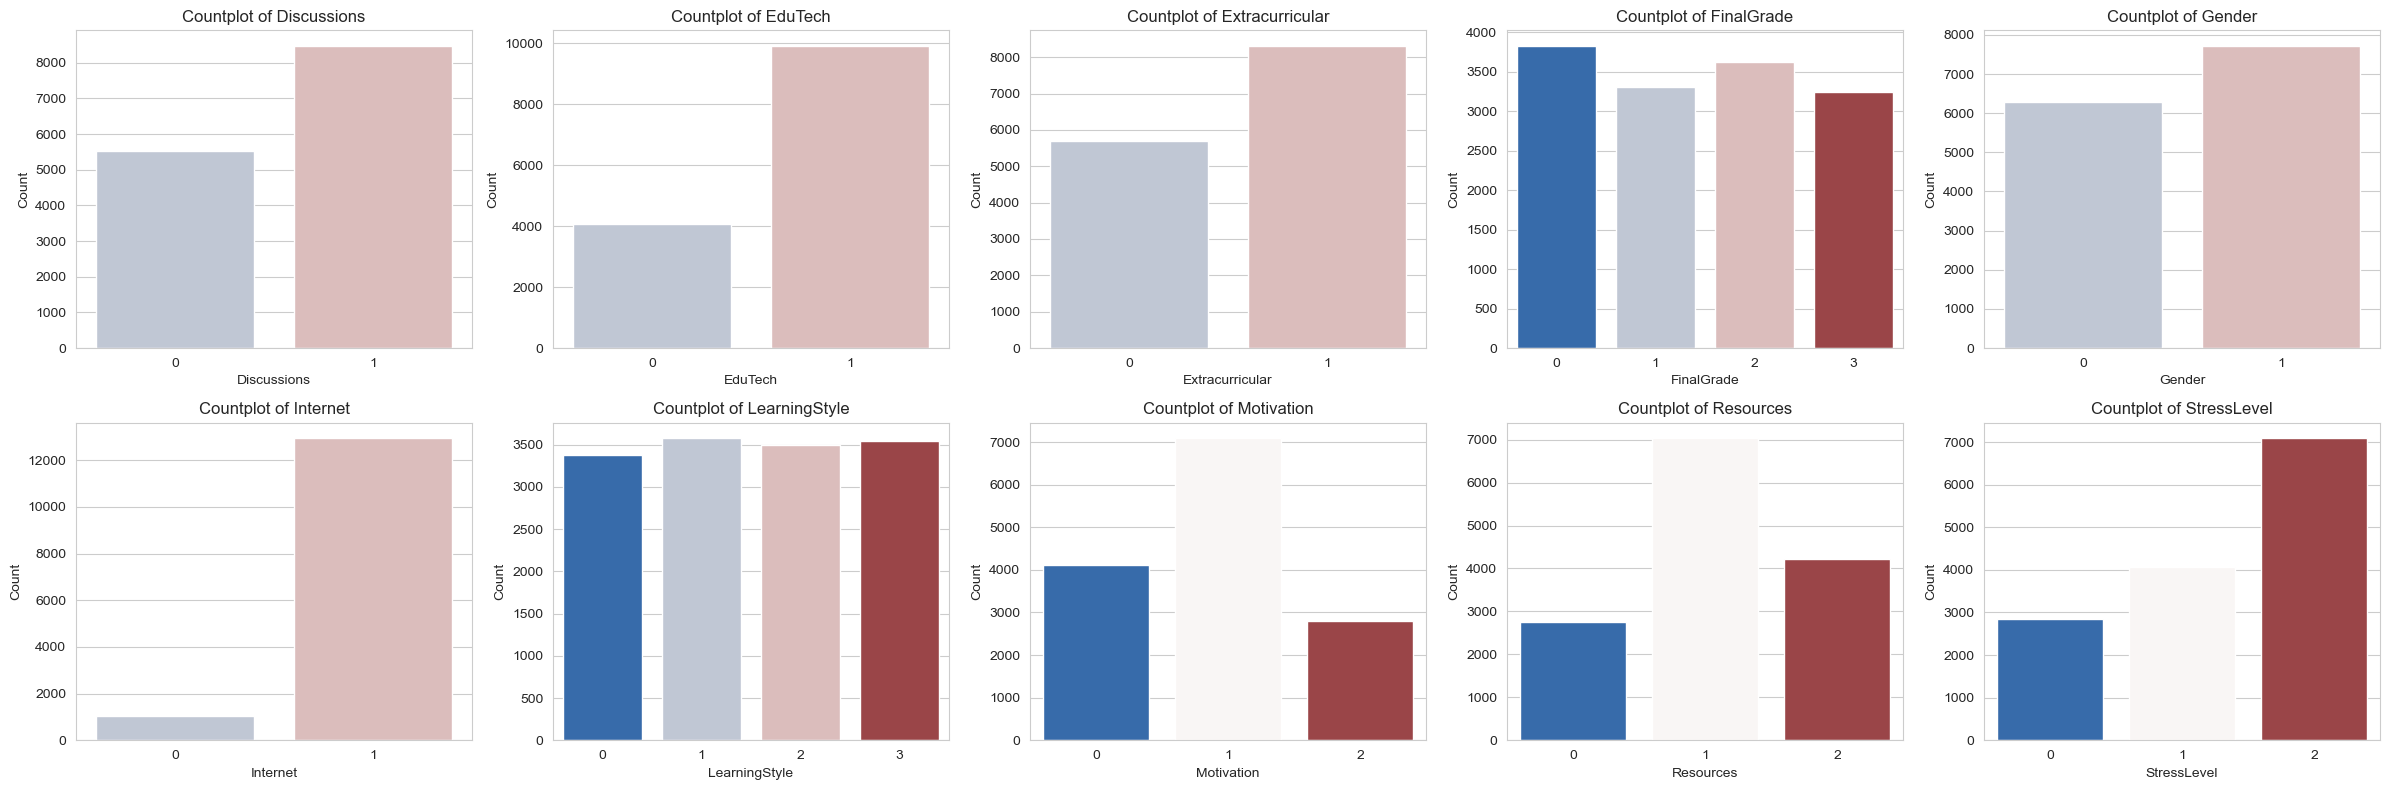

In [6]:
#segregate
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]
categorical_columns = df.columns.difference(numerical_columns).difference(['GradeClass']).to_list()

# Determine the number of rows and columns for subplots
num_cols = 5  # Adjust as needed
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols # Calculate rows dynamically

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 4 * num_rows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through the columns and create a countplot for each
for i,col in enumerate(categorical_columns):
    sns.countplot(x=col, data=df, ax=axes[i], legend=False,hue=col,palette='vlag') #palette='winter')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any unused subplots if the number of plots is not a perfect multiple of num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


<h4>Below observation of countplots of categorical variables</h4>
<ul>
  <li>Students engaging in <b>Discussion, Extracurricular</b> shows good balance</li>
  <li>Very less no. of students don't use <b>internet</b>, yet it looks normal</li>
  <li><b>Learning style</b> and <b>Final grades</b> shows relative balance and co-relation</li>
  <li><b>Motivation</b> and <b>Resources</b> show normal distribution indicating co-relation and balance</li>
  <li><b>Stress level</b> shows rising trend</li>
  <li><b>Gender distribution</b> between male and female looks balanced</li>
</ul>


<h4 style="background-color: #F0F8FF; padding: 10px; border: 1px solid #ddd;">2.2. Distribution of Numerical Features</h4>

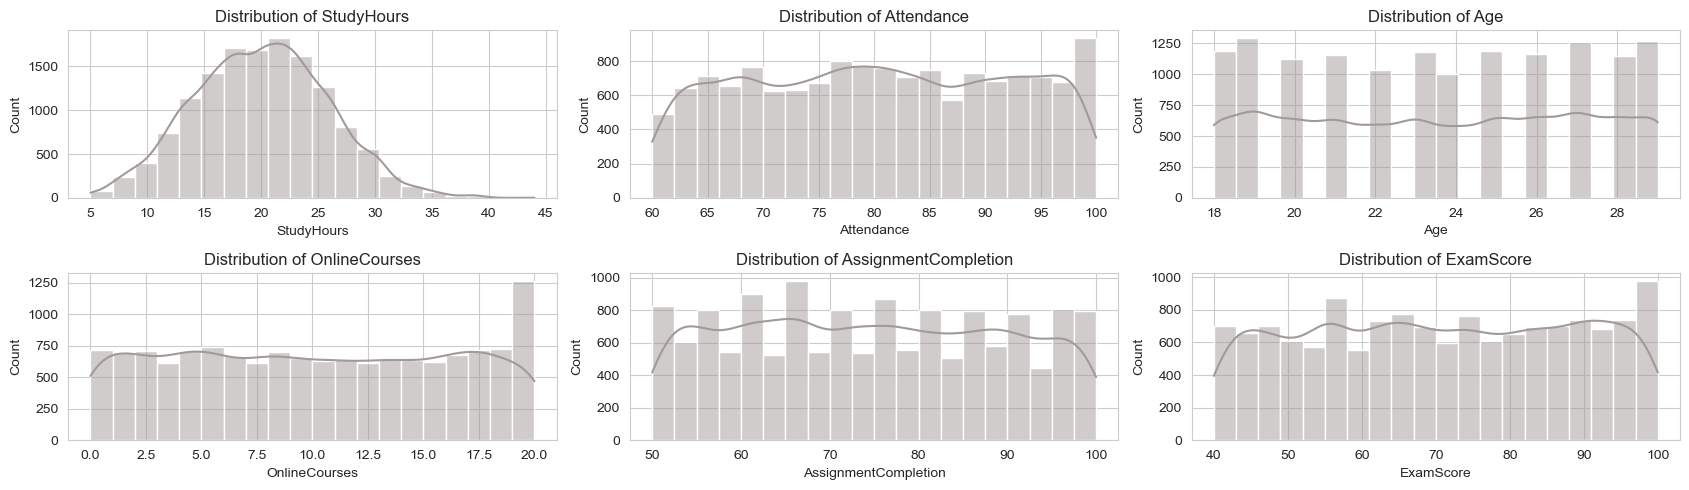

In [7]:
# Determine the number of rows and columns for subplots
num_cols = 3  # Adjust as needed
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols # Calculate rows dynamically

# Create a figure and a set of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Loop through the columns and create a countplot for each
for i,col in enumerate(numerical_columns):
    sns.histplot(x=col, data=df, ax=axes[i], kde=True, legend=False,color='#A19A99', bins=20,
                 )
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove any unused subplots if the number of plots is not a perfect multiple of num_cols
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()


<h4>Below observation of countplots of categorical variables</h4>
<ul>
  <li>Only <b>Study Hours</b> Shows normal distribution.</li>
  <li>All other values shows irregular pattern</li>
</ul>


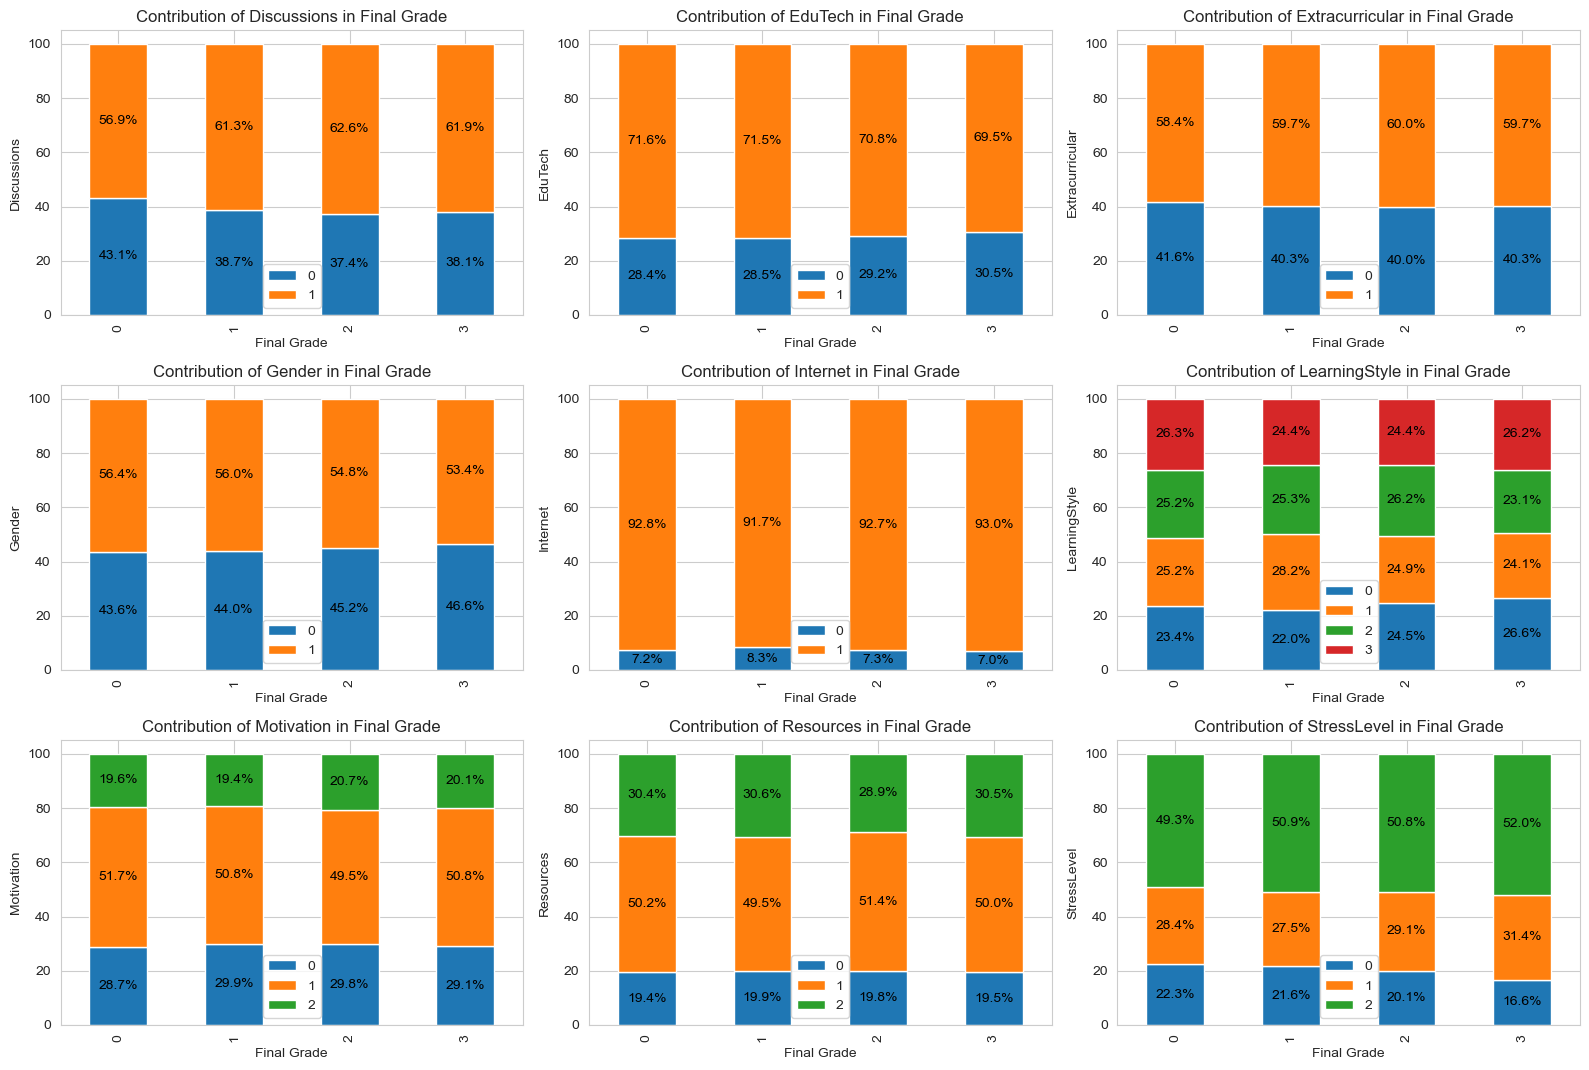

In [8]:
# Determine the number of rows and columns for subplots
num_cols = 3  # Adjust as needed
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols # Calculate rows dynamically


# Create a figure and a set of subplots
fig, ax_stacked = plt.subplots(num_rows,num_cols, figsize=(16, 3.5 * num_rows)) # Adjust figure size as needed

# unpack all the axes subplots
axe = ax_stacked.ravel()

#remove Final Grade from plot
categorical_stack = [item for item in categorical_columns if item != "FinalGrade"]


# loop and plot categorical_stack
for i,var in enumerate(categorical_stack):
    # Group the data, unstack, and plot
        plot_data=df.groupby(['FinalGrade',var]).size().unstack()
    # 2. Normalize to percentages
        percentages = plot_data.apply(lambda x: x / x.sum() * 100,axis=1)
        # Create a new figure and axes for each plot
        axe_percent=percentages.plot(kind='bar', stacked=True, ax=axe[i])
        axe[i].set_title(f'Contribution of {var} in Final Grade')
        axe[i].set_ylabel(var)
        axe[i].set_xlabel('Final Grade')
        axe[i].legend()
        for container in axe_percent.containers:
            axe_percent.bar_label(container, fmt='%.1f%%', label_type='center', color='black')


# Remove any unused subplots if the number of plots is not a perfect multiple of num_cols
for j in range(i + 1, len(axe)):
    fig.delaxes(axe[j])


# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout()
plt.show()


<h4 style="background-color: #F0F8FF; padding: 10px; border: 1px solid #ddd;">2.3. Correlation matrix of whole dataset</h4>

In [9]:
# Generating correlation coefficient between each features
correlation=df.corr()
correlation

,StudyHours,Attendance,Resources,Extracurricular,Motivation,Internet,Gender,Age,LearningStyle,OnlineCourses,Discussions,AssignmentCompletion,ExamScore,EduTech,StressLevel,FinalGrade
StudyHours,1.000000,0.027618,-0.008199,-0.002479,-0.007484,0.006644,-0.014307,-0.003158,0.025826,-0.005347,0.027381,0.010546,0.004494,0.013955,0.004779,-0.009623
Attendance,0.027618,1.000000,-0.011981,-0.002836,-0.006295,-0.026136,0.027942,-0.043953,-0.031512,0.000198,-0.005485,0.005588,-0.014681,0.005162,-0.018446,0.010870
Resources,-0.008199,-0.011981,1.000000,-0.006811,0.007316,-0.023833,0.003510,-0.006966,-0.012294,0.003534,-0.004774,-0.003365,0.003033,-0.003303,-0.004952,-0.002907
Extracurricular,-0.002479,-0.002836,-0.006811,1.000000,0.011640,-0.017887,0.010455,-0.002097,-0.001128,-0.008328,-0.002631,-0.009205,-0.010561,-0.011014,0.016795,0.010560
Motivation,-0.007484,-0.006295,0.007316,0.011640,1.000000,0.010067,0.005990,-0.003565,0.011332,0.004759,-0.020341,0.009531,-0.001981,0.017907,-0.000594,0.002726
Internet,0.006644,-0.026136,-0.023833,-0.017887,0.010067,1.000000,0.009127,-0.001389,0.009196,-0.000520,-0.007836,-0.008065,-0.005108,0.004522,-0.002961,0.006345
Gender,-0.014307,0.027942,0.003510,0.010455,0.005990,0.009127,1.000000,-0.022359,0.030066,0.009517,-0.003459,-0.011209,0.021342,0.014119,0.027533,-0.022517
Age,-0.003158,-0.043953,-0.006966,-0.002097,-0.003565,-0.001389,-0.022359,1.000000,-0.008495,0.002547,-0.022620,-0.017257,-0.007193,0.012039,0.006026,0.002903
LearningStyle,0.025826,-0.031512,-0.012294,-0.001128,0.011332,0.009196,0.030066,-0.008495,1.000000,0.005017,-0.011315,0.025369,0.013528,0.015680,0.014797,-0.017735
OnlineCourses,-0.005347,0.000198,0.003534,-0.008328,0.004759,-0.000520,0.009517,0.002547,0.005017,1.000000,0.003100,0.007866,0.021024,-0.009934,0.006612,-0.020984


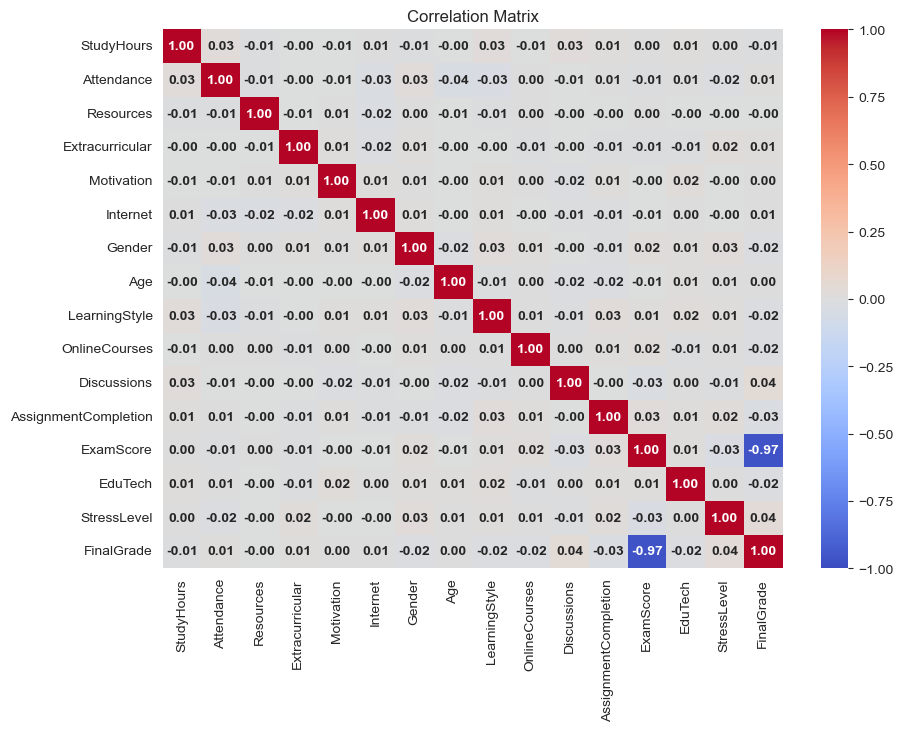

In [10]:
#plot correlation matrix
plt.figure(figsize = (10,7))
mask = (abs(df.corr()) < 0.7)
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f',vmin=-1,vmax=1,annot_kws={"size": 10, "weight": "bold"})
plt.title('Correlation Matrix')
plt.show()

<h4>Below observation of correlation matrix</h4>
<ul>
  <li>Only <b>ExamScore</b> and <b>FinalGrade</b> shows relation as -0.97 which is closest to -1</li>
  <li>All other values are in far range which shows no relation</li>
</ul>